In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with np.load('../draws_sim_p_10_f_3_T_100_b_10000_d_10000.npz') as data_:
    data = data_['arr_0']
data = data[:, :, 0:50, 0:30]

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [3]:
# alpha = [1, 5, 10, 15, 20]
alpha = [1]
beta = 10

1
[-1.10545430e+00  8.64033789e-05 -2.33897673e-01 -6.18964022e-01
 -4.90293560e-01 -2.62415342e-01 -4.98764583e-01 -6.45660181e-01
 -1.50201713e-01 -3.40452302e-01 -6.11658349e-01 -6.09985598e-01
 -2.55703410e-01 -1.05383778e-01 -1.30566827e-01 -5.40711980e-01
 -3.48497514e-01 -2.38212128e-01 -6.61049486e-01 -7.85290720e-01
 -7.34077918e-01 -5.21662151e-01 -2.90903130e-01 -7.15802151e-01
 -5.12064065e-01 -3.15931403e-01 -2.80276146e-01 -8.51330522e-01
 -2.91504381e-01 -6.41797852e-01]


Text(0.5, 1.0, 'Difference in Losses across $\\alpha$s')

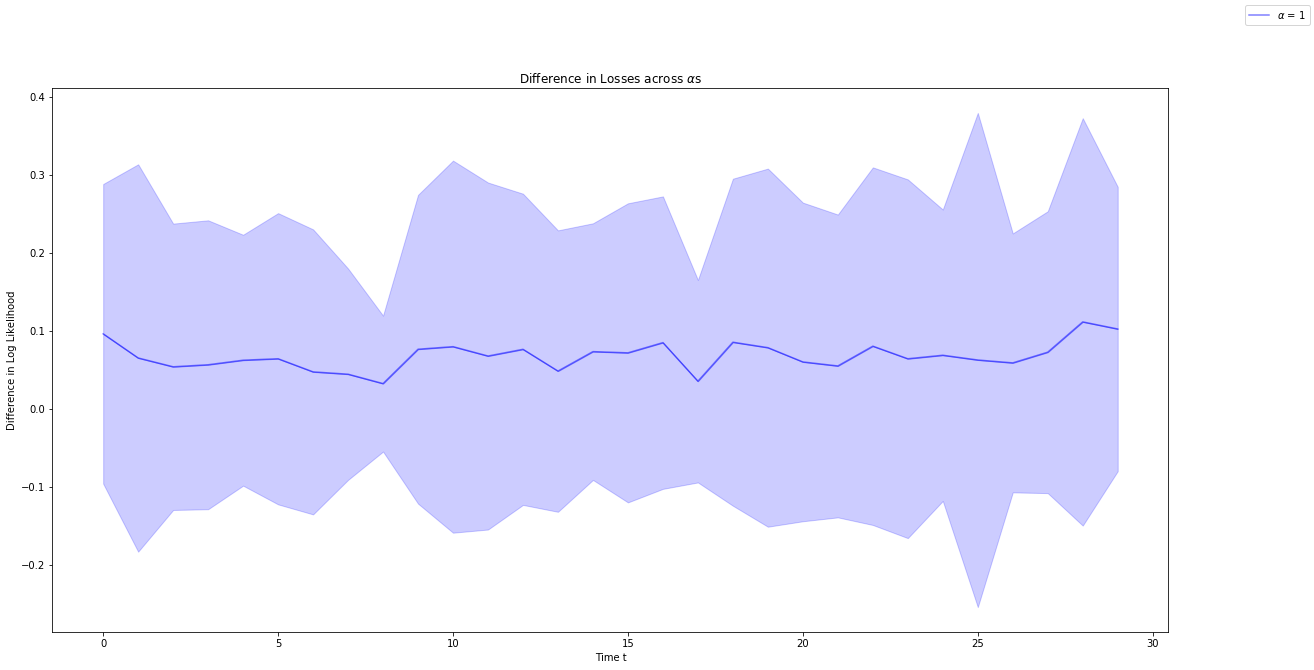

In [4]:
from regain.covariance import TimeGraphicalLasso
fig, ax = plt.subplots(figsize=(20, 10))
colors = "bgrcmykw"
color_index = 0

for i in alpha:
    emp_diff, sam_diff, qual = TimeGraphicalLasso(alpha=i, beta=beta, max_iter=5000, psi='kernel', gamma=0.9).fit_cov(data).eval_pre(data)
    print(i)
    print(qual)
    std = np.std(sam_diff, 1)

    ax.plot(range(30), emp_diff, color=colors[color_index], alpha=0.5, label=r'$\alpha$ = {}'.format(i))
    ax.fill_between(range(30), emp_diff, emp_diff - std, color=colors[color_index], alpha=0.2)
    ax.fill_between(range(30), emp_diff, emp_diff + std, color=colors[color_index], alpha=0.2)
    color_index += 1

fig.legend()
ax.set_ylabel('Difference in Log Likelihood')
ax.set_xlabel('Time t')
ax.set_title(r'Difference in Losses across $\alpha$s')  